<a href="https://colab.research.google.com/github/ola-sumbo/Hamoye-Internship/blob/master/Embedded_Code_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload() #upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sumbomarcus","key":"bda91b58e9e222d3cd57693f8d0ab049"}'}

In [ ]:
!pip install kaggle
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [ ]:
import json
token = {"username":"sumbomarcus","key":"bda91b58e9e222d3cd57693f8d0ab049"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle config set -n path -v{/content}
!kaggle competitions download -c planet-understanding-the-amazon-from-space -p /content

- path is now set to: {/content}
  0% 0.00/151k [00:00<?, ?B/s]
100% 151k/151k [00:00<00:00, 59.0MB/s]
  0% 0.00/148k [00:00<?, ?B/s]
100% 148k/148k [00:00<00:00, 49.2MB/s]
  0% 0.00/600k [00:00<?, ?B/s]
100% 600k/600k [00:00<00:00, 83.3MB/s]
  0% 0.00/1.52M [00:00<?, ?B/s]
100% 1.52M/1.52M [00:00<00:00, 104MB/s]
  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 144MB/s]


In [ ]:
!unzip \*.zip

Archive:  sample_submission_v2.csv.zip
  inflating: sample_submission_v2.csv  

Archive:  Kaggle-planet-test-tif.torrent.zip
  inflating: Kaggle-planet-test-tif.torrent  

Archive:  train_v2.csv.zip
  inflating: train_v2.csv            

Archive:  Kaggle-planet-train-tif.torrent.zip
  inflating: Kaggle-planet-train-tif.torrent  

4 archives were successfully processed.


In [ ]:
import pandas as pd
d = pd.read_csv('train_v2.csv')
d.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


TypeError: ignored

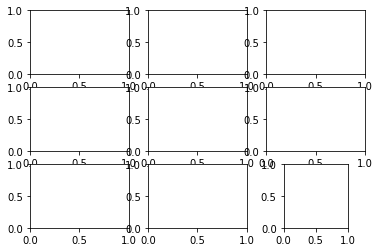

In [ ]:
# plot the first 9 images in the planet dataset
import matplotlib.pyplot as pyplot
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.preprocessing import image
import cv2
import matplotlib.image as mpimg
import  numpy as np
# define location of dataset
folder = 'train-jpg/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'train_' + str(i) + '.jpg'
# load image pixels
img = cv2.imread(filename)
# plot raw pixel data
plt.imshow(img)
# show the figure
plt.show()

In [ ]:
# load and summarize the mapping file for the planet dataset
from pandas import read_csv
# load file as CSV
filename = 'train_v2.csv'
mapping_csv = read_csv(filename)

In [ ]:
# summarize properties
print(mapping_csv.shape)
print(mapping_csv[:10])

(40479, 2)
  image_name                                         tags
0    train_0                                 haze primary
1    train_1              agriculture clear primary water
2    train_2                                clear primary
3    train_3                                clear primary
4    train_4    agriculture clear habitation primary road
5    train_5                           haze primary water
6    train_6  agriculture clear cultivation primary water
7    train_7                                 haze primary
8    train_8        agriculture clear cultivation primary
9    train_9   agriculture clear cultivation primary road


In [ ]:

# create a set of labels
labels = set()
for i in range(len(mapping_csv)):
	# convert spaced separated tags into an array of tags
	tags = mapping_csv['tags'][i].split(' ')
	# add tags to the set of known labels
	labels.update(tags)
 
# create a set of labels
labels = set()
for i in range(len(mapping_csv)):
	# convert spaced separated tags into an array of tags
	tags = mapping_csv['tags'][i].split(' ')
	# add tags to the set of known labels
	labels.update(tags)

In [ ]:
# create integer that maps tags to integer
# convert set of labels to a list to list
labels = list(labels)
# order set alphabetically
labels.sort()

# convert set of labels to a list to list
labels = list(labels)
# order set alphabetically
labels.sort()

In [ ]:
# dict that maps labels to integers, and the reverse
labels_map = {labels[i]:i for i in range(len(labels))}
inv_labels_map = {i:labels[i] for i in range(len(labels))}

In [ ]:
# create a mapping of tags to integers given the loaded mapping file
def create_tag_mapping(mapping_csv):
	# create a set of all known tags
	labels = set()
	for i in range(len(mapping_csv)):
		# convert spaced separated tags into an array of tags
		tags = mapping_csv['tags'][i].split(' ')
		# add tags to the set of known labels
		labels.update(tags)
	# convert set of labels to a list to list
	labels = list(labels)
	# order set alphabetically
	labels.sort()
	# dict that maps labels to integers, and the reverse
	labels_map = {labels[i]:i for i in range(len(labels))}
	inv_labels_map = {i:labels[i] for i in range(len(labels))}
	return labels_map, inv_labels_map

**To view the number of tags and explore how tags vary across usage**

In [ ]:
# create a mapping of tags to integers
from pandas import read_csv
 
# create a mapping of tags to integers given the loaded mapping file
def create_tag_mapping(mapping_csv):
	# create a set of all known tags
	labels = set()
	for i in range(len(mapping_csv)):
		# convert spaced separated tags into an array of tags
		tags = mapping_csv['tags'][i].split(' ')
		# add tags to the set of known labels
		labels.update(tags)
	# convert set of labels to a list to list
	labels = list(labels)
	# order set alphabetically
	labels.sort()
	# dict that maps labels to integers, and the reverse
	labels_map = {labels[i]:i for i in range(len(labels))}
	inv_labels_map = {i:labels[i] for i in range(len(labels))}
	return labels_map, inv_labels_map
 
# load file as CSV
filename = 'train_v2.csv'
mapping_csv = read_csv(filename)
# create a mapping of tags to integers
mapping, inv_mapping = create_tag_mapping(mapping_csv)
print(len(mapping))
print(mapping)

17
{'agriculture': 0, 'artisinal_mine': 1, 'bare_ground': 2, 'blooming': 3, 'blow_down': 4, 'clear': 5, 'cloudy': 6, 'conventional_mine': 7, 'cultivation': 8, 'habitation': 9, 'haze': 10, 'partly_cloudy': 11, 'primary': 12, 'road': 13, 'selective_logging': 14, 'slash_burn': 15, 'water': 16}


In [ ]:
# create a mapping of filename to tags
def create_file_mapping(mapping_csv):
	mapping = dict()
	for i in range(len(mapping_csv)):
		name, tags = mapping_csv['image_name'][i], mapping_csv['tags'][i]
		mapping[name] = tags.split(' ')
	return mapping

# create a mapping of filename to tags
def create_file_mapping(mapping_csv):
	mapping = dict()
	for i in range(len(mapping_csv)):
		name, tags = mapping_csv['image_name'][i], mapping_csv['tags'][i]
		mapping[name] = tags.split(' ')
	return mapping

**Create an in memory dataset for saving and  prediction
**

In [ ]:
def load_image_pixels(filename, shape):
	# load the image to get its shape
	image = load_img(filename)
	width, height = image.size
	# load the image with the required size
	image = load_img(filename, target_size=shape)
	# convert to numpy array
	image = img_to_array(image)
	# scale pixel values to [0, 1]
	image = image.astype('float32')
	image /= 255.0
	# add a dimension so that we have one sample
	image = expand_dims(image, 0)
	return image, width, height

In [ ]:
# get tags
# create a mapping of tags to integers given the loaded mapping file
def create_tag_mapping(mapping_csv):
    # create a set of all known tags
    labels = set()
    for i in range(len(mapping_csv)):
        # convert space separated tags into an array of tags
        tags = mapping_csv['Labels'][i].split(' ')
        # add tags to the set of known labels
        labels.update(tags)
    # convert set of labels to a list to list
    labels = list(labels)
    # order set alphabetically
    labels.sort()
    # dict that maps labels to integers, and the reverse
    labels_map = {labels[i]:i for i in range(len(labels))}
    inv_labels_map = {i:labels[i] for i in range(len(labels))}
    return labels_map, inv_labels_map

# create a mapping of filename to tags
def create_file_mapping(mapping_csv):
    mapping = dict()
    for i in range(len(mapping_csv)):
        name, tags = mapping_csv['Id'][i], mapping_csv['Labels'][i]
        mapping[name] = tags.split(' ')
        return mapping

In [ ]:
# load all images into memory
def load_dataset(path, file_mapping, tag_mapping):
	photos, targets = list(), list()
	# enumerate files in the directory
	for filename in listdir(folder):
		# load image
		photo = load_img(path + filename, target_size=(128,128))
		# convert to numpy array
		photo = img_to_array(photo, dtype='uint8')
		# get tags
		tags = file_mapping[filename[:-4]]
		# one hot encode tags
		target = one_hot_encode(tags, tag_mapping)
		# store
		photos.append(photo)
		targets.append(target)
	X = asarray(photos, dtype='uint8')
	y = asarray(targets, dtype='uint8')
	return X, y
  

**Time Series FORECASTING**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv( "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv" )
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df["Month"] = pd.to_datetime(df["Month"]) #convert column to datatime 
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
df.reset_index(inplace=True)

Text(0, 0.5, 'Passengers')

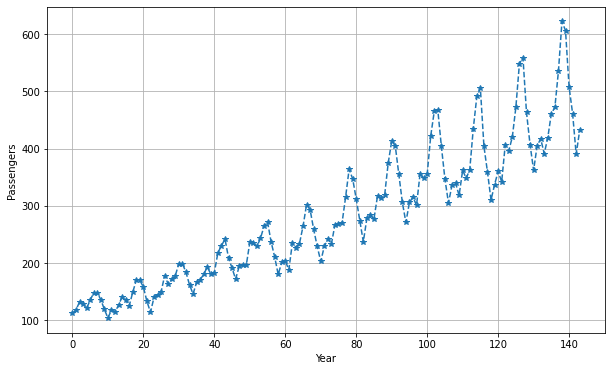

In [5]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Passengers, '--', marker='*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

In [6]:
#check for missing values 
df.isnull().values.any() ##There are no missing values in our dataset however, in bid to explain how we handle 

False

**We will copy our dataset and delete some missing values in the bid to explain how to fill missing values**

In [7]:
df_copy = df.copy()

In [8]:
rows = df_copy.sample(frac=0.1, random_state=0)
rows['Passengers'] = np.nan
df_copy.loc[rows.index, 'Passengers'] = rows['Passengers'] # assigning the random sample numbers picked to their index location to be the values in the passengers column to fill np.nan
df_copy.isnull().sum() #There are now 14 missing values in the dataset 

index          0
Month          0
Passengers    14
dtype: int64

**Filling missing data by imputation - Forward fill**

In [9]:
df_copy_ffill = df_copy.fillna(method='ffill')
df_copy_ffill.isnull().sum()

index         0
Month         0
Passengers    0
dtype: int64

In [10]:
#Filling missing data by imputation - Backward fill
df_copy_bfill = df_copy.fillna(method='bfill')
df_copy_bfill.isnull().sum()

index         0
Month         0
Passengers    0
dtype: int64

**Filling missing values by interpolation**

In [11]:
df_copy_LIF = df_copy.interpolate(method='linear', limit_direction='forward')
df_copy_LIF.isnull().sum()

index         0
Month         0
Passengers    0
dtype: int64

In [12]:
df_copy_LIB = df_copy.interpolate(method='linear', limit_direction='backward')
df_copy_LIB.isnull().sum()

index         0
Month         0
Passengers    0
dtype: int64

**Downsampling and Upsampling**

In [13]:
# Downsampling to quartely data 
df_quartely = df.resample('3M', on='Month').mean()

Text(0, 0.5, 'Passengers')

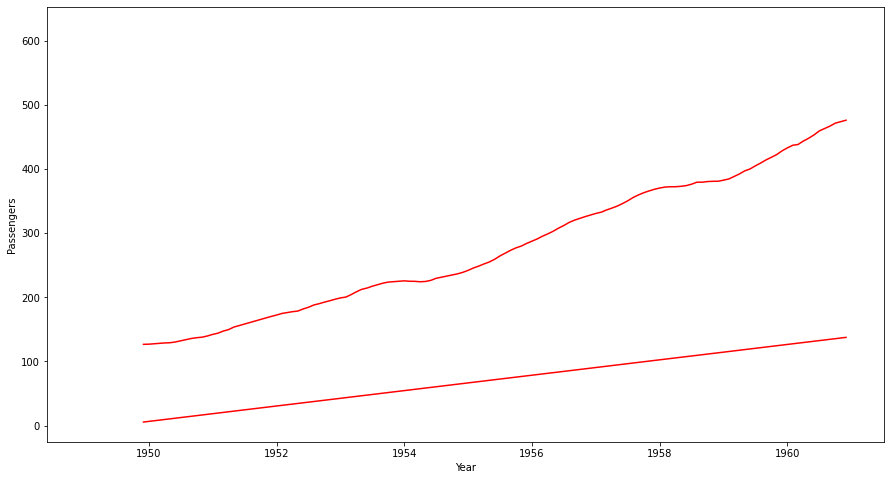

In [71]:
# Upsampling to daily data point 
df_daily = df.resample('D').mean()

plt.plot(df_daily.index, df_daily.Passengers, '-')
plt.plot(df.rolling(12).mean(), color='red')
plt.xlabel( 'Year' )
plt.ylabel( 'Passengers' ) 


Text(0, 0.5, 'Passengers')

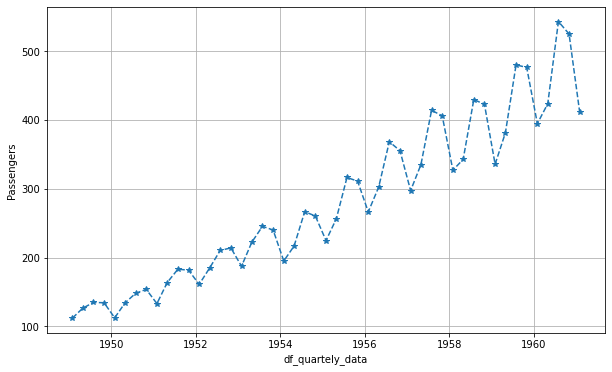

In [16]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_quartely.index, df_quartely.Passengers, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'df_quartely_data' )
plt.ylabel( 'Passengers' ) 

Text(0, 0.5, 'Passengers')

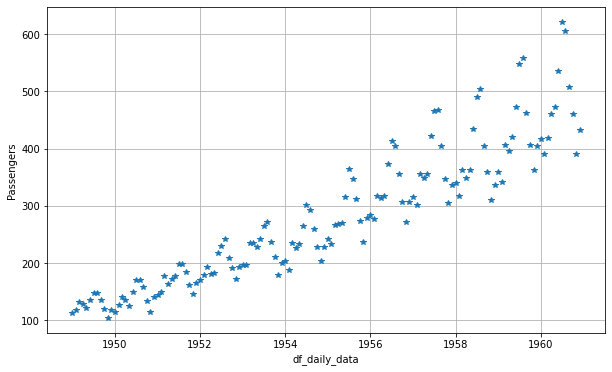

In [17]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily.Passengers, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'df_daily_data' )
plt.ylabel( 'Passengers' ) 

Text(0, 0.5, 'Passengers')

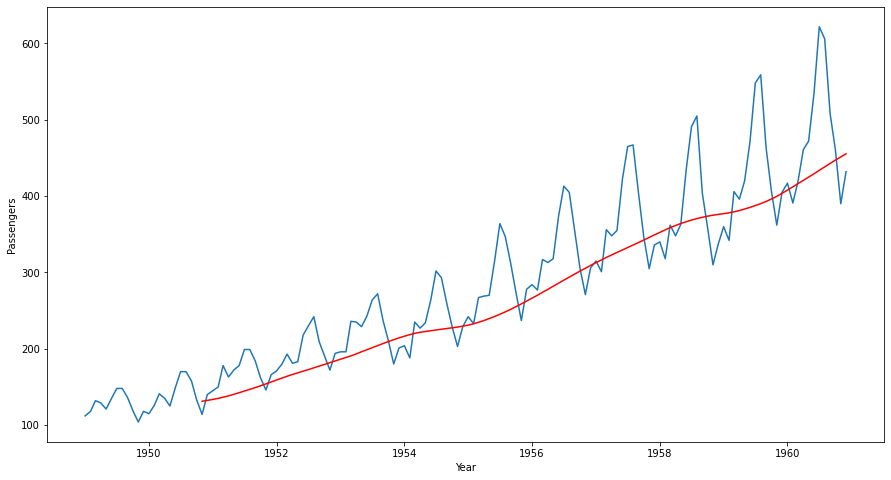

In [72]:
df_MA = df.copy()
MA = df_MA['Passengers'].rolling(12).mean()
plt.plot(df.index, df.Passengers, '-')
plt.plot(MA.rolling(12).mean(), color='red')
plt.xlabel( 'Year' )
plt.ylabel( 'Passengers' ) 


**Time Series Specific Explanatory Models**

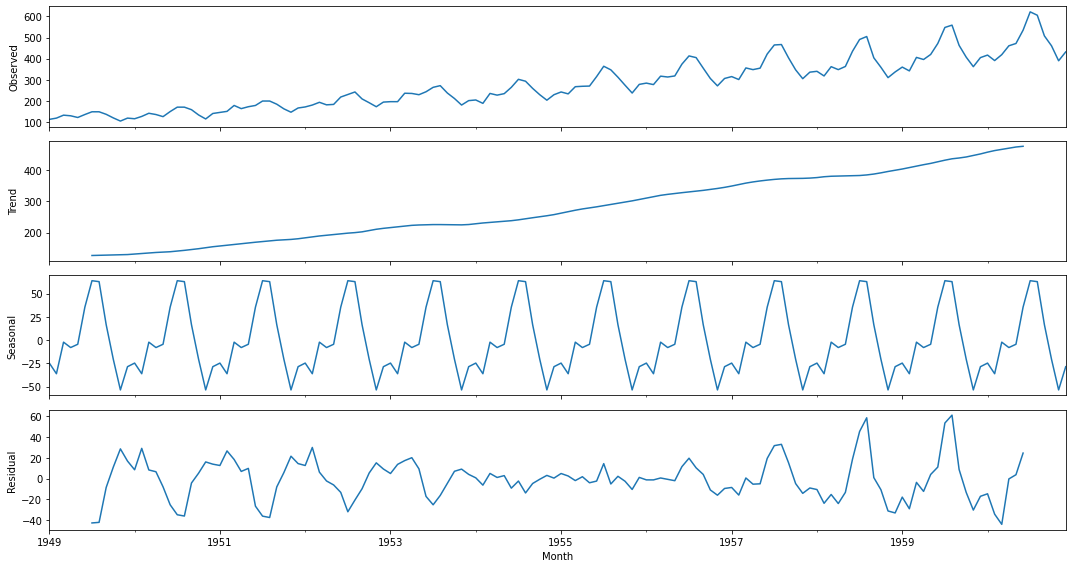

In [42]:
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

rcParams['figure.figsize'] = 15, 8
df = df.set_index('Month')
decompose_series = sm.tsa.seasonal_decompose(df['Passengers'], model='additive')
decompose_series.plot()
plt.show()

**The decomposed time series show an obvious increasing trend and seasonality variations.
Recall that we have initially plotted the moving average on the last 12 months which showed
that it varies with time. This suggests that the data is not stationary. We will now perform
an ADF test to confirm this speculation**

In [59]:
from statsmodels.tsa.stattools import adfuller 
adf_result = adfuller(df['Passengers'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p_value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used: {adf_result[3]}')
print(f'Critical_values:')
for k, v in adf_result[4].items():
  print(f'  {k} : {v}')


ADF Statistic: 0.815368879206047
p_value: 0.991880243437641
No. of lags used: 13
No. of observations used: 130
Critical_values:
  1% : -3.4816817173418295
  5% : -2.8840418343195267
  10% : -2.578770059171598


**From the results obtained, the p-value is greater than the critical value at a 5% significance level and, the ADF statistic is greater that any of the critical values obtain. #This confirms that the series is indeed non-stationary. ** 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log



Text(0, 0.5, 'Passengers')

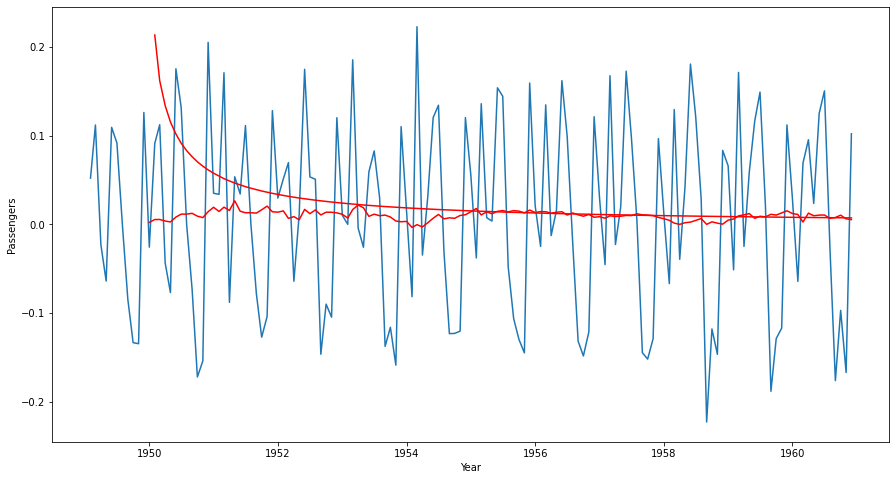

In [68]:
# Convert time series to stationary by removing trend and seasonality through log transformation and differencing
df_log = np.log(df)
df_diff = df_log.diff(periods=1)
plt.plot(df_diff.index, df_diff.Passengers, '-')
plt.plot(df_diff.rolling(12).mean(), color='red')
plt.xlabel( 'Year' )
plt.ylabel( 'Passengers' ) 